# 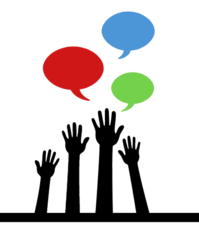

# The Sparks Foundation
## Graduate Rotational Internship Program (GRIP) April2021 Batch
## Data Science & Business Analytics 

# Task - 3 Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
### This task is about Exploratory Data Analysis - Retail  to find out weak areas where he can work to make more profit.                                                  
By: Kavali Kranthi Kumar                                

In [1]:
# Importing all libraries required in this notebook
import numpy as np #For numerical operations
import pandas as pd #For handling the dataset
import seaborn as sns #For visualization 
import matplotlib.pyplot as plt #For visualization
%matplotlib inline

## Importing and reading the dataset

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


## Exploring about dataset

In [3]:
#getting the information of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.duplicated().sum() #total duplicate present in data

17

In [5]:
df.drop_duplicates(inplace=True) #dropping the duplicate values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [7]:
#Here postal code is not a useful column,hence we dropping it.
df.drop(['Postal Code'],axis=1,inplace=True)

### The dataset consists of 13 features and each feature consists of 9994 samples.

In [8]:
#checking for null values presents in the dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### As we see there is not null values present in the dataset

In [9]:
#Finding the correlation between the features
df.corr() # here profit and sales has some coorelation.

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


### Here the correlation is done only 5 columns because the remaining columns contains non numerical values.

## Visualizing the dataset

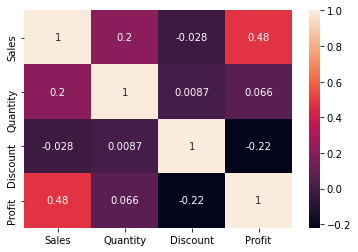

In [10]:
# Visualizing the correlation between the features
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

### Here 1 represents strong positive correlation and -0.2 for negative correlation.

In [11]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

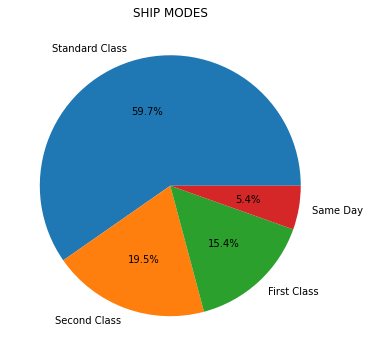

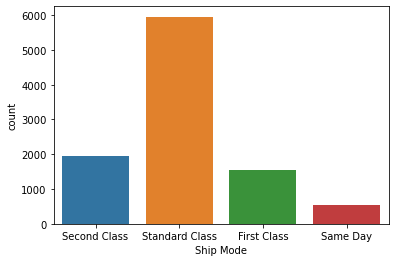

In [12]:
plt.figure(figsize=(6,6))
plt.title('SHIP MODES')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct='%1.1f%%')
plt.show()
sns.countplot(x=df['Ship Mode'])

### In ship mode, most of them are preferring the standard class.

In [13]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

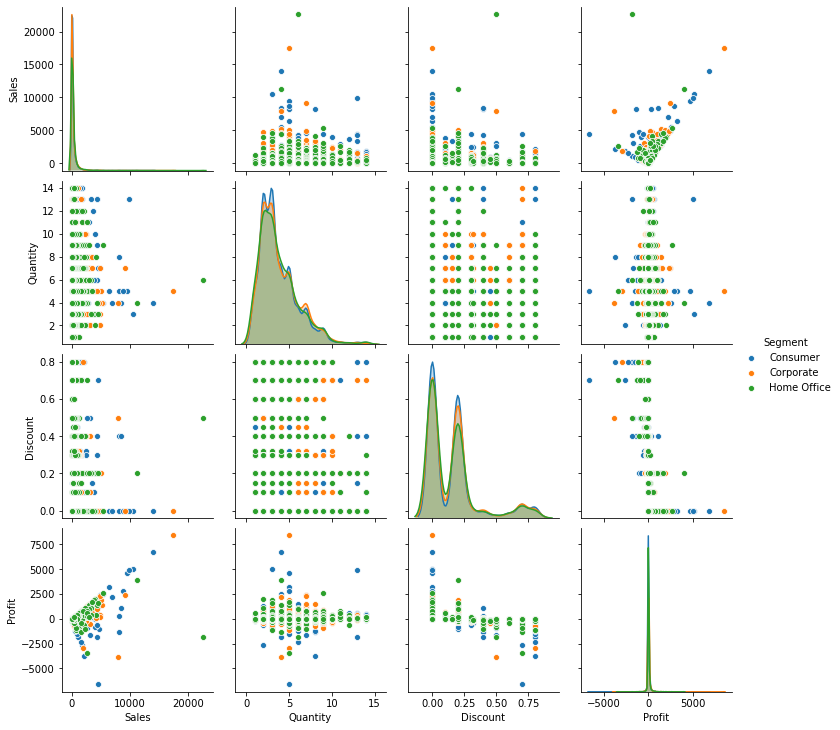

In [14]:
sns.pairplot(df,hue="Segment")

### Here we can see in segment, profit and sales has some positive coorelation

In [15]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

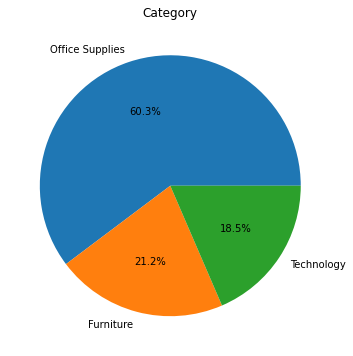

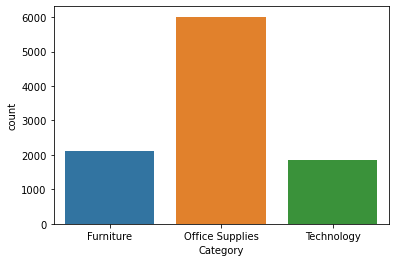

In [16]:
plt.figure(figsize=(6,6))
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels = df['Category'].value_counts().index, autopct='%1.1f%%')
plt.show()
sns.countplot(x='Category',data=df)

### Here office supplies category has more then furniture and technology

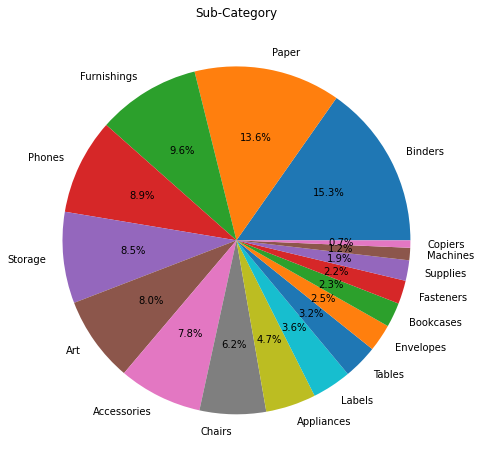

In [17]:
plt.figure(figsize = (8,8))
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(), labels=df['Sub-Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

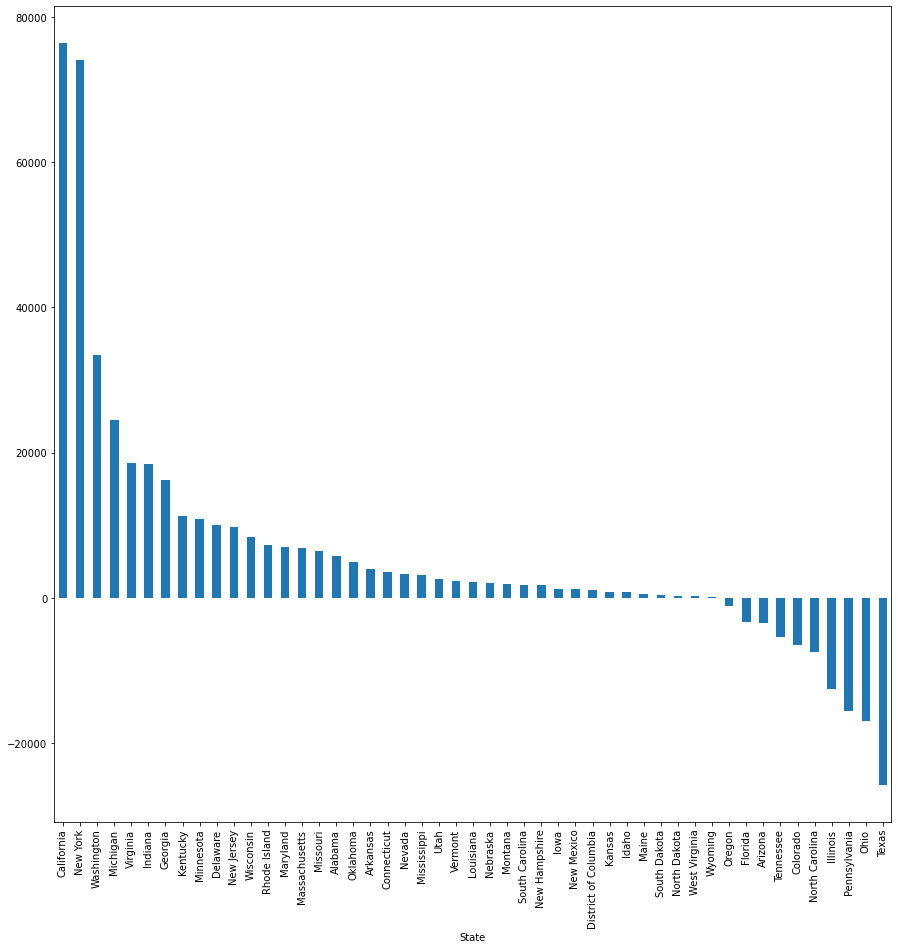

In [18]:
plt.figure(figsize=(15,15))
stpr = df.groupby(['State'])['Profit'].sum().nlargest(50)
stpr.plot.bar()

### Graph Display that California and New York have the highest Profits while Texas and Ohio have the least profits

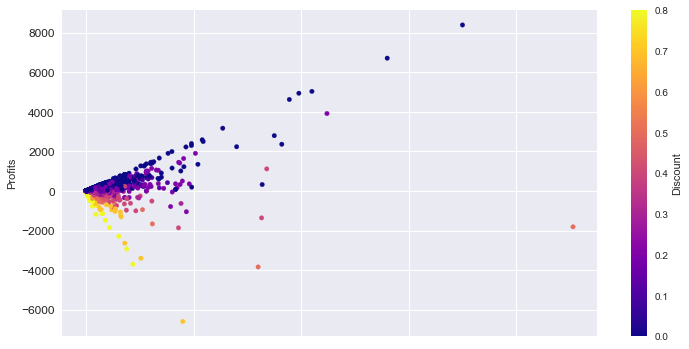

In [20]:
plt.style.use('seaborn')
df.plot(kind="scatter",figsize=(12,6), x="Sales",y="Profit",c="Discount",s=20,fontsize=12,colormap='plasma')
plt.ylabel('Profits')
plt.xlabel('sales')
plt.show()

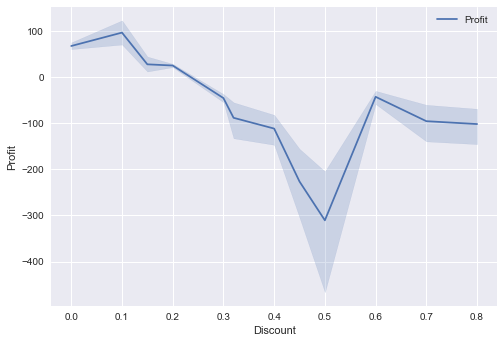

In [30]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

### We can clearly observe that the discount has a negative relation with Profit i.e. as the profit is increasing the Profit generated is decreased.

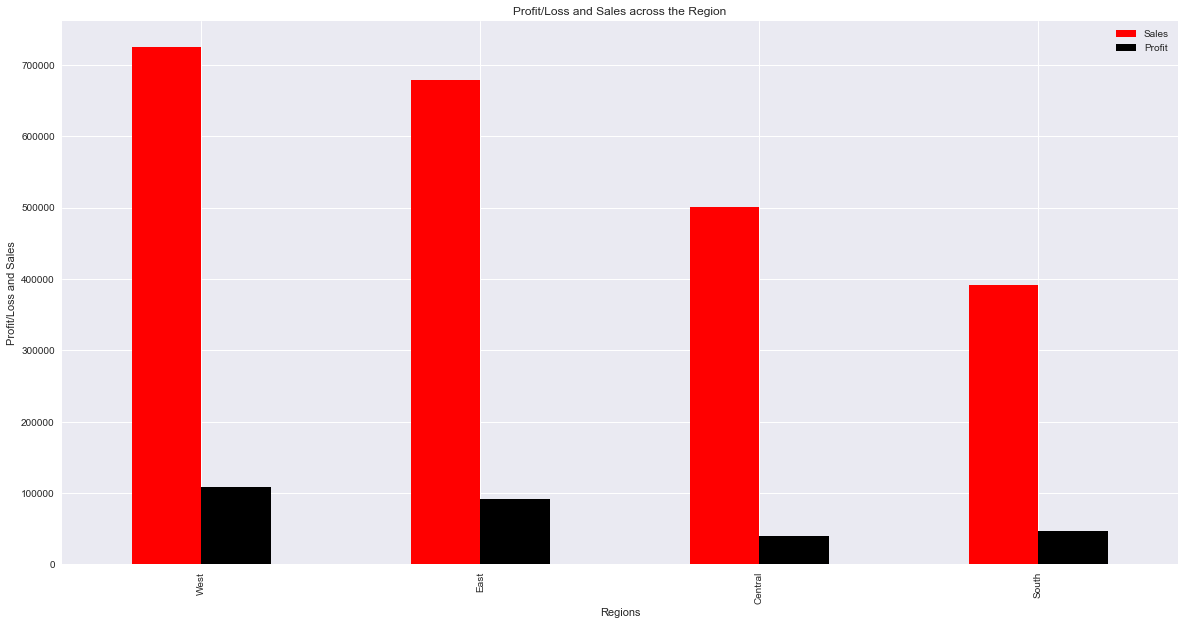

In [28]:
pls = df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the Region')
plt.xlabel('Regions')
plt.ylabel('Profit/Loss and Sales')
plt.show()

### More the Discount More the Sales but Lesser the Profits

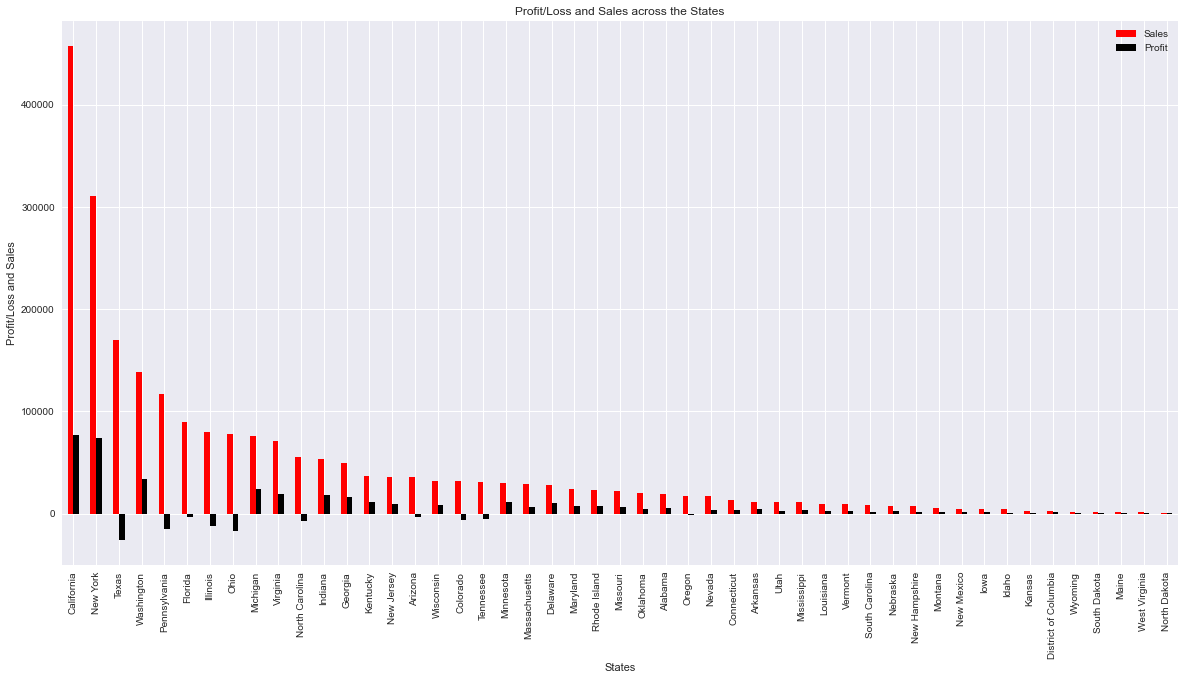

In [29]:
pls = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

### 1. Work more on California and New York as they are places of Maximum sales
### 2. Decrease Discounts in Southern Region to Increase sales
### 3. Reduce sales of furniture as it has very less profit compared to sales
### 4.The profit generated by Office supplies category is more, but the sales for office supplies are less. So, we have to work on increasing the sales for Office Supplies Category.

# Thank you